# Standard rest-activity measure calculation

In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib.dates import WeekdayLocator
import seaborn as sns

In [2]:
actdf = pd.read_csv('/Users/mcmahonmc/Github/machine-learning-2021/final_project/data/actigraphy_data_hourly_df.csv')
print('actigraphy df')
print(actdf.shape)

actigraphy df
(169, 125)


In [12]:
from wearables import fitcosinor, npmetrics
from datetime import datetime

rar = pd.DataFrame()

for subject in actdf.columns:
    
    df = pd.DataFrame(actdf[subject][:-2]).set_index(pd.to_datetime(
        pd.date_range(start = pd.to_datetime('2021-01-01 00:00:00'),
                      end = pd.to_datetime('2021-01-01 00:00:00') + pd.Timedelta(days=7),
                      freq='30S'),
        format = '%Y-%m-%d %H:%M:%S'))
    
    df.columns = ['Activity']
    
    cr = np.array(fitcosinor.fitcosinor(df)[0].T.values).T[0]
    nonp = npmetrics.np_metrics_all(df['Activity'])
    
    rar[subject] = np.concatenate((cr, nonp[:3]))
    
rar = rar.T
rar.columns = ['actmin', 'amp', 'alpha', 'beta', 'phi', 'IS', 'IV', 'RA']
rar

In [13]:
rar = pd.read_csv('/Users/mcmahonmc/Github/machine-learning-2021/final_project/rar_df.csv', index_col=0)

drop_subs = [ int(subject) for subject in rar.index if str(subject) not in actdf.columns.values ]
drop_subs

rar2 = (rar[~rar.index.isin(drop_subs)])
print(rar2.shape)

(116, 8)


In [14]:
[col for col in targets.columns if 'mean_active' in col]

['duration_mean_active', 'total_ac_mean_active', 'sleep_time_mean_active']

In [15]:
[col for col in targets.columns if 'mean_sleep' in col]

['duration_mean_sleep',
 'total_ac_mean_sleep',
 'onset_latency_mean_sleep',
 'efficiency_mean_sleep',
 'sleep_time_mean_sleep']

<AxesSubplot:>

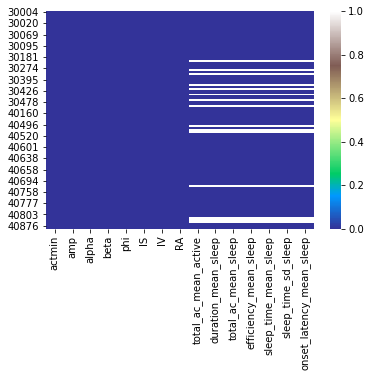

In [16]:
rar2 = rar2.merge(targets[['total_ac_mean_active',
                    'duration_mean_sleep', 
                    'total_ac_mean_sleep', 
                   'efficiency_mean_sleep',
                   'sleep_time_mean_sleep',
                   'sleep_time_sd_sleep',
                   'onset_latency_mean_sleep']],
          left_index=True, right_index=True)

sns.heatmap(rar2.isnull(), cmap='terrain')

In [17]:
# rar.to_csv('/Users/mcmahonmc/Github/machine-learning-2021/final_project/rar_df.csv')

In [121]:
rar = pd.read_csv('/Users/mcmahonmc/Github/machine-learning-2021/final_project/rar_df.csv')

targets = pd.read_csv('/Users/mcmahonmc/Github/machine-learning-2021/final_project/target_data.csv')
targets['edge_mean'] = targets[[x for x in targets.columns if x.startswith('edge_')]].mean(axis=1)

In [122]:
pd.merge(rar, targets, left_on = 'Unnamed: 0', right_on = 'subject')

,Unnamed: 0_x,actmin,amp,alpha,beta,phi,IS,IV,RA,Unnamed: 0_y,...,Left.hippocampal.fissure,Left.Whole_hippocampal_body,Left.Whole_hippocampal_head,Left.Whole_hippocampus,Right.Hippocampal_tail,Right.hippocampal.fissure,Right.Whole_hippocampal_body,Right.Whole_hippocampal_head,Right.Whole_hippocampus,cc_fa
0,30004,0.696391,2.000000,-0.839879,12.174420,15.700554,0.237301,0.497090,0.978493,0,...,103.610701,1044.195719,1398.964955,2907.251396,468.379186,106.077142,1020.857892,1441.995366,2931.232444,0.582804
1,30008,1.047358,1.552863,-0.853070,325.423752,16.600185,0.261227,0.524768,0.961466,1,...,144.813418,1204.042983,1634.228393,3445.750080,618.218806,145.052717,1213.668913,1635.260923,3467.148642,0.559800
2,30009,1.088250,1.621375,-0.839957,385.754408,14.813229,0.236853,0.194339,0.965710,2,...,136.160494,1192.518585,1599.914291,3328.766941,543.045786,146.643748,1232.700746,1807.269141,3583.015674,0.601367
3,30012,1.384584,1.437337,-0.613403,7.015407,15.689278,0.268342,0.299328,0.954806,3,...,161.352783,1288.481710,1835.814889,3751.599484,663.701747,133.943847,1328.224316,1944.852320,3936.778383,0.587033
4,30015,1.070629,1.605177,-0.690900,419.617253,14.554844,0.214801,0.286109,0.974820,4,...,148.140462,1356.785914,1886.936232,3894.608270,704.116073,154.378972,1418.849716,1858.631846,3981.597634,0.586247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,40855,0.968828,1.611690,-0.441357,278.707630,15.357639,0.281765,0.393956,0.929667,111,...,170.593990,1076.777270,1435.407917,3107.817477,635.886503,175.417475,1094.449991,1575.843183,3306.179677,NaN
112,40859,1.762660,0.910938,-0.580580,435.862944,14.358228,0.260628,0.715527,0.881364,112,...,134.776211,1083.616531,1292.730790,2990.671483,588.987373,131.490185,1022.651680,1264.980072,2876.619125,NaN
113,40861,2.000000,0.557801,-0.612585,10.996928,11.843457,0.211993,0.442061,0.719981,113,...,194.849007,1233.935858,1884.858216,3705.570884,606.106704,199.832531,1257.263536,1893.275499,3756.645739,0.488233
114,40876,0.601127,2.000000,-0.899820,8.769209,16.459194,0.259224,0.467280,0.885357,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524456


In [16]:
[col for col in targets.columns if 'mean_active' in col]

['duration_mean_active', 'total_ac_mean_active', 'sleep_time_mean_active']

<AxesSubplot:>

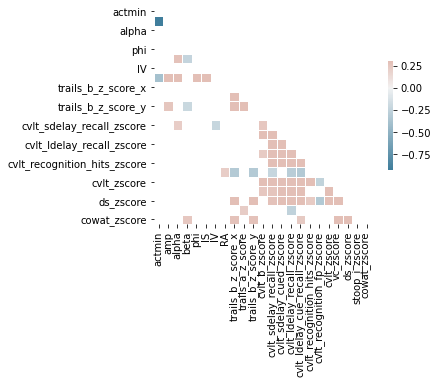

In [126]:
corr = pd.merge(rar, targets[[col for col in targets.columns if 'z_score' in col] +
                                   [col for col in targets.columns if 'zscore' in col] + 
                             ['subject']],
                left_on = 'Unnamed: 0', right_on = 'subject').drop(['subject', 'Unnamed: 0'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr[np.abs(corr) > 0.2], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})